<a href="https://colab.research.google.com/github/wcrowley342/Lesson_Regression_Pie_Sales_Econometrics/blob/main/Econometric_Model_Example_for_Pie_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link to data:
https://docs.google.com/spreadsheets/d/1RFn1cHQnpqRln8dbEer4L_kZphtHRMxxxKqYlrmcUfg/edit#gid=0

link to article:
https://www.saxifrage.xyz/post/econometrics-python

link to colab template:
https://colab.research.google.com/drive/1l1LVOwCe5EEOgRe_yh9FgzcDBhmO-yMN

In [ ]:
#import the data
import pandas as pd
data = pd.read_csv('pie_sales - data.csv')
data.head()

,Week,"Pie Sales ($1,000s)",Price ($),"Advertising ($1,000s)",Holiday
0,1,350,5.5,3.3,0
1,2,460,7.5,3.3,1
2,3,350,8.0,3.0,0
3,4,430,8.0,4.5,1
4,5,350,6.8,3.0,0


In [ ]:
#cleaning the data 

#copying out the data
df = data.copy()

df.drop('Week', axis='columns', inplace=True)
df.index = df.index + 1 #to match week number

cols = {
    'Pie Sales ($1,000s)': 'sales',
    'Price ($)': 'price',
    'Advertising ($1,000s)': 'ads',
    'Holiday': 'holiday'
}

df.rename(columns=cols, inplace=True)

df.head()


,sales,price,ads,holiday
1,350,5.5,3.3,0
2,460,7.5,3.3,1
3,350,8.0,3.0,0
4,430,8.0,4.5,1
5,350,6.8,3.0,0


In [ ]:
# Run SKLearn Linear Regression Model 
from sklearn import linear_model

predict_y = 'sales'
dependent_x = ['price','ads','holiday'] 

y = df[predict_y]
x = df[dependent_x]

model = linear_model.LinearRegression()
model.fit(x, y)

r_sq = round(model.score(x,y), 2)
print('R squared', r_sq)

R squared 0.84


In [ ]:
#print coefficeints 
for n in range(len(x.columns)):
  print(x.columns[n], round(model.coef_[n], 2))

print('intercept', round(model.intercept_, 2))

price -17.29
ads 16.34
holiday 89.43
intercept 415.1


In [ ]:
#make predictions

df['forecast'] = model.predict(x)
df['forecast'] = df['forecast'].round().astype(int)
df.head()

#see how close the predictions were to the actuals based upon the model

,sales,price,ads,holiday,forecast
1,350,5.5,3.3,0,374
2,460,7.5,3.3,1,429
3,350,8.0,3.0,0,326
4,430,8.0,4.5,1,440
5,350,6.8,3.0,0,347


Text(0, 0.5, 'Pie Sales ($1,000s)')

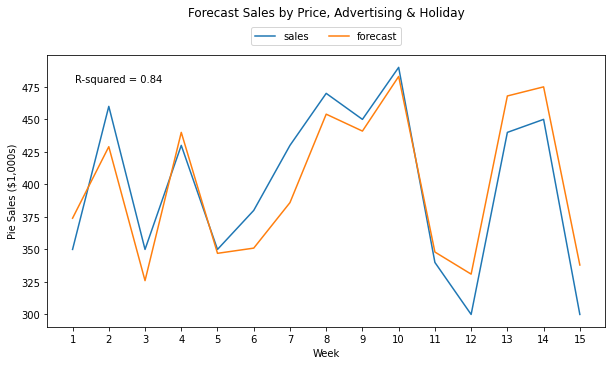

In [ ]:
#visualizing data

#plot line chart with matplotlib

import matplotlib.pyplot as plt

df.plot(y=['sales', 'forecast'], kind = 'line', figsize = (10,5))

plt.title('Forecast Sales by Price, Advertising & Holiday', y=1.12)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=2)
plt.annotate(f'R-squared = {r_sq}', xy=(0.05, 0.90), xycoords='axes fraction')

plt.xlabel('Week')
plt.xticks(df.index) # force all x values to show
plt.ylabel('Pie Sales ($1,000s)')